<a href="https://colab.research.google.com/github/arnav-007/newcodingbot/blob/main/medical_insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [37]:
#data collection & analysis
insurance_dataset = pd.read_csv('/content/insurance.csv')

In [38]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [39]:
insurance_dataset.shape

(1338, 7)

In [40]:
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [41]:
insurance_dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

categorical features:

'1) sex

2) smokers

3) region


data analysis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


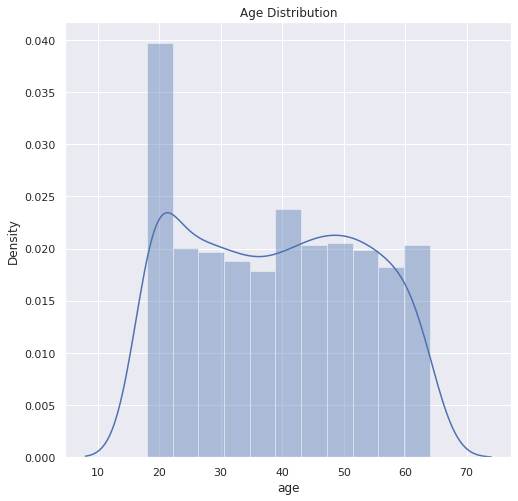

In [42]:
# age value
sns.set()
plt.figure(figsize=(8,8))
sns.distplot(insurance_dataset['age'])
plt.title('Age Distribution')
plt.show()

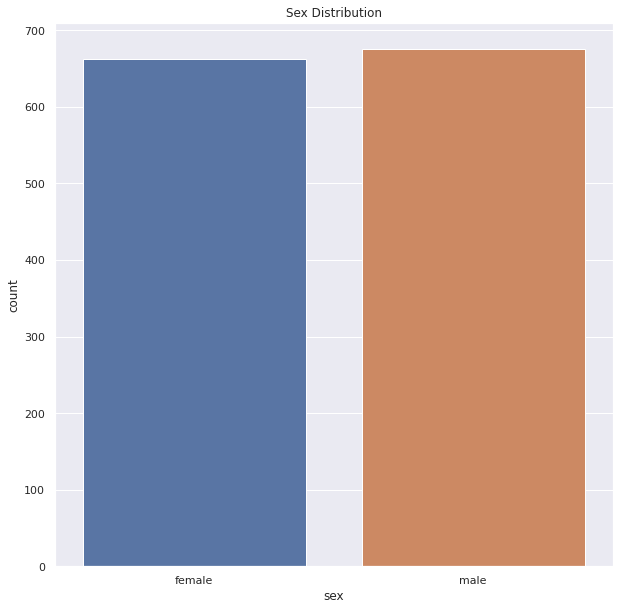

In [43]:
plt.figure(figsize=(10,10))
sns.countplot(x='sex', data=insurance_dataset)
plt.title('Sex Distribution')
plt.show()


In [44]:
insurance_dataset['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


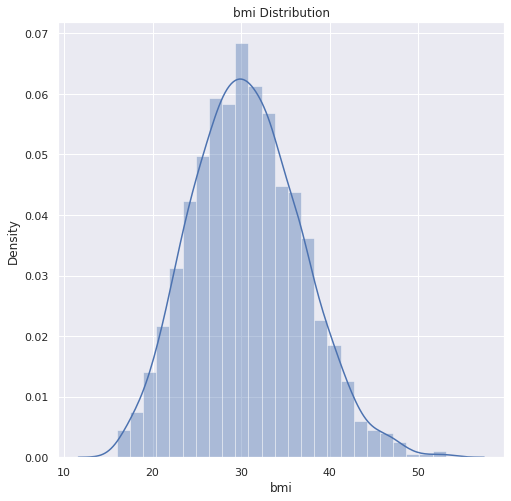

In [45]:
plt.figure(figsize=(8,8))
sns.distplot(insurance_dataset['bmi'])
plt.title('bmi Distribution')
plt.show()

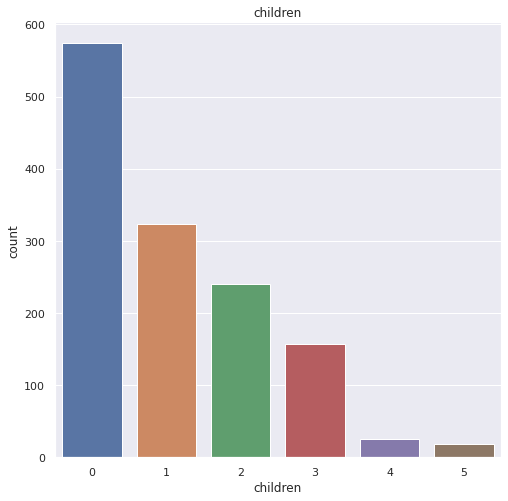

In [46]:
#children column
plt.figure(figsize=(8,8))
sns.countplot(x='children', data=insurance_dataset)
plt.title('children')
plt.show()

In [47]:
insurance_dataset['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

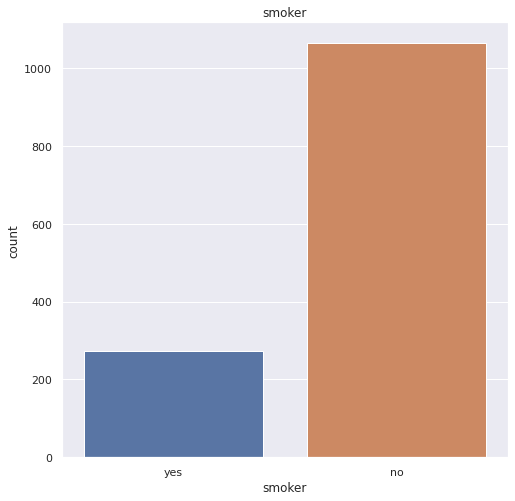

In [48]:
#smoker column
plt.figure(figsize=(8,8))
sns.countplot(x='smoker', data=insurance_dataset)
plt.title('smoker')
plt.show()

In [49]:
insurance_dataset['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

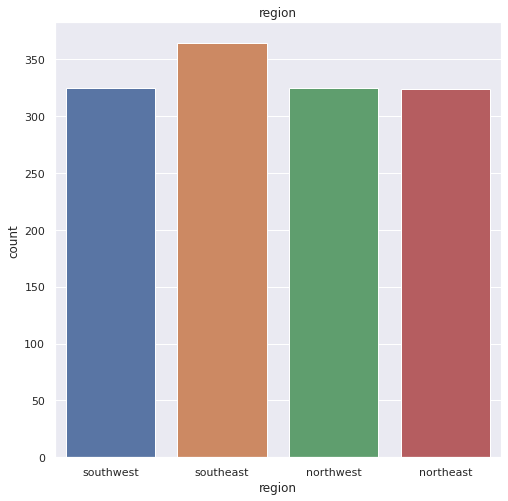

In [50]:
#region column
plt.figure(figsize=(8,8))
sns.countplot(x='region', data=insurance_dataset)
plt.title('region')
plt.show()

In [51]:
insurance_dataset['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


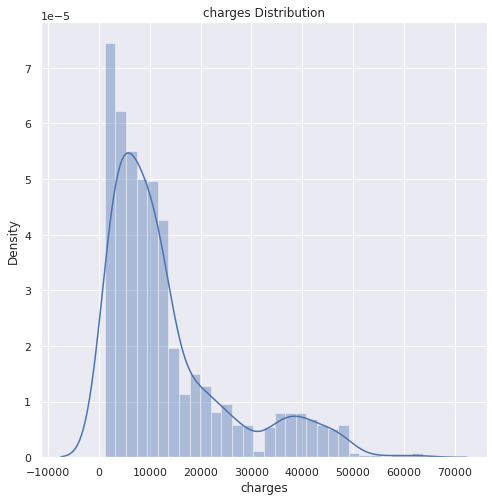

In [52]:
# distribution of charges value
plt.figure(figsize=(8,8))
sns.distplot(insurance_dataset['charges'])
plt.title('charges Distribution')
plt.show()

data preprocessing

In [57]:
#encoding
insurance_dataset.replace({'sex':{'male':0, 'female':1}}, inplace=True)

insurance_dataset.replace({'smoker':{'yes':0, 'no':1}}, inplace=True)

insurance_dataset.replace({'region':{'southeast':0, 'southwest':1, 'northeast':2,'northwest':3}}, inplace=True)

split the features

In [58]:
X = insurance_dataset.drop(columns='charges', axis=1)
Y = insurance_dataset['charges']

In [59]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [60]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [63]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.1,random_state=2)

In [65]:
print(X.shape,X_train.shape,X_test.shape)

(1338, 6) (1204, 6) (134, 6)


Model training

In [66]:
regressor = LinearRegression()

In [67]:
regressor.fit(X_train, Y_train)

LinearRegression()

model evaluation

In [68]:
training_data_prediction = regressor.predict(X_train)

In [69]:
# r square values
r2_train = metrics.r2_score(Y_train, training_data_prediction)

In [70]:
print('R squared value', r2_train)

R squared value 0.7533807289098102


In [76]:
test_data_prediction = regressor.predict(X_test)

In [77]:
r2_test = metrics.r2_score(Y_test, test_data_prediction)

In [78]:
print('R squared value', r2_test)

R squared value 0.7064951721664847


building a productive data

In [81]:
input_data = (25,0,26.22,0,1,2)
#converting to numy array
input_data_as_numpy_array = np.asarray(input_data)
#reshape the data as awe are predicting the label for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)

print(prediction)

print('the insurance cost is USD', prediction[0])


[2771.66145571]
the insurance cost is USD 2771.6614557054118


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
